In this project i am gonna build 2 models to predict if the price of gold is gonna go up. 

I will use two models **LogisticRegression** and **RandomForestClassifier**. To see which one gives me better results.


In [107]:
# Import packages
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing and modeling
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter('ignore')

In [72]:
#Load the data
data = pd.read_csv(r"C:\Users\ponce\Desktop\Data Sc\Projects\Gold Market Predictor\gold_prices_over_time.csv")
data.head()

,Date,Open,High,Low,Close
0,01/02/2013,"1,676.40","1,695.40","1,670.90","1,688.80"
1,01/02/2014,"1,204.50","1,230.80","1,202.50","1,225.20"
2,01/02/2015,"1,184.00","1,194.90","1,167.30","1,186.20"
3,01/02/2018,"1,305.30","1,320.40","1,304.60","1,316.10"
4,01/02/2019,"1,285.00","1,291.00","1,280.60","1,284.10"


In [73]:
#check basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3703 non-null   object
 1   Open    3703 non-null   object
 2   High    3703 non-null   object
 3   Low     3703 non-null   object
 4   Close   3703 non-null   object
dtypes: object(5)
memory usage: 144.8+ KB


In [74]:
#converting objects type to numeric
data["Open"] = pd.to_numeric(data["Open"].replace(',','', regex=True), errors='coerce')
data["High"] = pd.to_numeric(data["High"].replace(',','', regex=True), errors='coerce')
data["Low"] = pd.to_numeric(data["Low"].replace(',','', regex=True), errors='coerce')
data["Close"] = pd.to_numeric(data["Close"].replace(',','', regex=True), errors='coerce')

#converting Date to datetime
data["Date"] = pd.to_datetime(data["Date"])

In [75]:
#getting statistics info
data.describe()


,Date,Open,High,Low,Close
count,3703,3703.000000,3703.000000,3703.000000,3703.000000
mean,2016-08-30 08:19:18.844180480,1465.472212,1475.929193,1454.359303,1465.322117
min,2009-04-24 00:00:00,887.500000,890.800000,880.100000,888.200000
25%,2012-12-26 12:00:00,1239.050000,1247.350000,1230.250000,1239.150000
50%,2016-08-30 00:00:00,1351.300000,1361.000000,1340.200000,1350.700000
75%,2020-05-05 12:00:00,1733.050000,1746.050000,1720.300000,1732.000000
max,2024-01-09 00:00:00,2094.400000,2152.300000,2074.600000,2093.100000
std,NaN,287.846134,290.011946,285.208983,287.517425


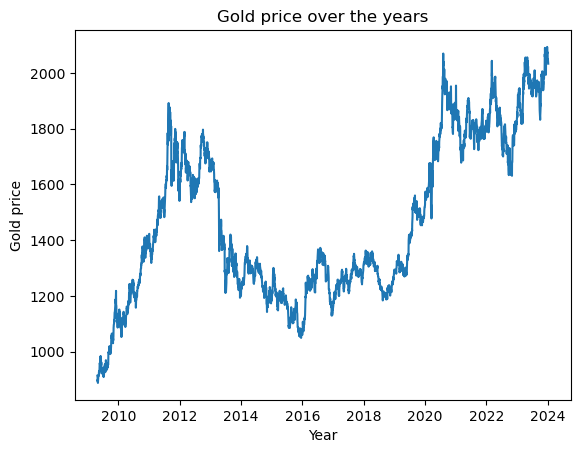

In [76]:
#Gold price over time

sns.lineplot(data, x="Date", y="Close")
plt.xlabel("Year")
plt.ylabel("Gold price")
plt.title("Gold price over the years");

In [77]:
#ordering the values by date
df = data.sort_values(by="Date").reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close
0,2009-04-24,905.5,915.4,904.2,914.1
1,2009-04-27,915.0,919.7,905.8,908.2
2,2009-04-28,907.2,907.7,884.6,893.6
3,2009-04-29,894.0,904.0,888.3,900.5
4,2009-04-30,898.6,900.8,880.1,891.2


In [78]:
#create a new binary variable that will tell us if the price went up the next day; 1 for 'yes', 0 for'no
df["Tomorrow Price"] = df["Close"].shift(-1)
df.head()

,Date,Open,High,Low,Close,Tomorrow Price
0,2009-04-24,905.5,915.4,904.2,914.1,908.2
1,2009-04-27,915.0,919.7,905.8,908.2,893.6
2,2009-04-28,907.2,907.7,884.6,893.6,900.5
3,2009-04-29,894.0,904.0,888.3,900.5,891.2
4,2009-04-30,898.6,900.8,880.1,891.2,888.2


In [79]:
df["Target"] = (df["Tomorrow Price"]>df["Close"]).astype(int) 
df.head()

,Date,Open,High,Low,Close,Tomorrow Price,Target
0,2009-04-24,905.5,915.4,904.2,914.1,908.2,0
1,2009-04-27,915.0,919.7,905.8,908.2,893.6,0
2,2009-04-28,907.2,907.7,884.6,893.6,900.5,1
3,2009-04-29,894.0,904.0,888.3,900.5,891.2,0
4,2009-04-30,898.6,900.8,880.1,891.2,888.2,0


In [81]:
#we gonna take the last 800 rows for testing. that's a bit more 0f 21%
#this is the best way to split the data because in reallife that's how we will predict prices
#study the past prices to pretic what's gonna come

train_data = df.iloc[:2903]
test_data = df.iloc[2903:]

 = train_data.drop(columns = ["Date","Tomorrow Price", "Target"])
X_test = test_data.drop(columns = ["Date","Tomorrow Price", "Target"])

y_train = train_data["Target"]
y_test = test_data["Target"]


In [82]:
#doble-checking everything sizes make sense
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2903, 4) (2903,) (800, 4) (800,)


# Using Logistic Regression

In [90]:
# Instantiate the Logistic Regression
clf = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)

#making predictions
clf_y_pred = clf.predict(X_test)

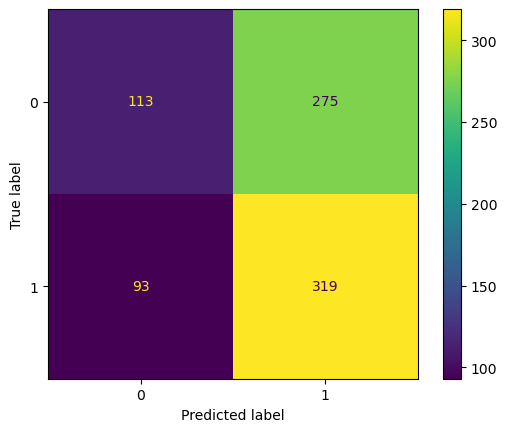

In [91]:
#evaluting the model
cm = confusion_matrix(y_test, clf_y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot();

This mean that 319 times the model said the price of gold was gonna go up and it went up. The model got it right.

113 times the model said the price of gold was not gonna go up and it didn't go up. The model got it right.

275 times the model said the price of gold was gonna go up and it didn't go up. The model got it wrong.

93 times the model said the price of gold was not gonna go up and it did go up. The model got it wrong.


In [92]:
#here we got the model scores

print("Accuracy Score: "+str(accuracy_score(y_test, clf_y_pred)))
print("Precision Score: "+str(precision_score(y_test, clf_y_pred)))
print("Recall Score: "+str(recall_score(y_test, clf_y_pred)))
print("F1 Score: "+str(f1_score(y_test, clf_y_pred)))

Accuracy Score: 0.54
Precision Score: 0.5370370370370371
Recall Score: 0.7742718446601942
F1 Score: 0.6341948310139166


In [118]:
#we can try to improve the model by scaling the X_train values
scaler = MinMaxScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))

In [119]:
# Instantiate a Logistic Regression with the scaled values
clf_2 = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled,y_train)
clf_y_pred_2 = clf.predict(X_test_scaled)

In [120]:
#model scores
print("Accuracy Score: "+str(accuracy_score(y_test, clf_y_pred_2)))
print("Precision Score: "+str(precision_score(y_test, clf_y_pred_2)))
print("Recall Score: "+str(recall_score(y_test, clf_y_pred_2)))
print("F1 Score: "+str(f1_score(y_test, clf_y_pred_2)))

Accuracy Score: 0.54875
Precision Score: 0.6186046511627907
Recall Score: 0.32281553398058255
F1 Score: 0.4242424242424243


**Note:**

Since Precision score is the proportion of positive predictions that were trus positives. This mean that if the model says that the price of gold is gonna go up there is a 61.8% chance that it will. 

This is a better result for this type of problem.

# Using Random Forest Classifier

In [103]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'n_estimators' : [50,100,None],
             'max_depth' : [10,50,70],
             'min_samples_leaf' : [0.5,1],
             'min_samples_split' : [0.001, 0.01],
             'max_features' : ["sqrt"],
             'max_samples' : [.5,.7,.9]}

# Instantiate the GridSearchCV object
rf_val = GridSearchCV(rf, cv_params, cv=5, refit='f1')
rf_val.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 50, 70], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100, None]},
             refit='f1')

In [104]:
#making predictions
y_pred = rf_val.predict(X_test)

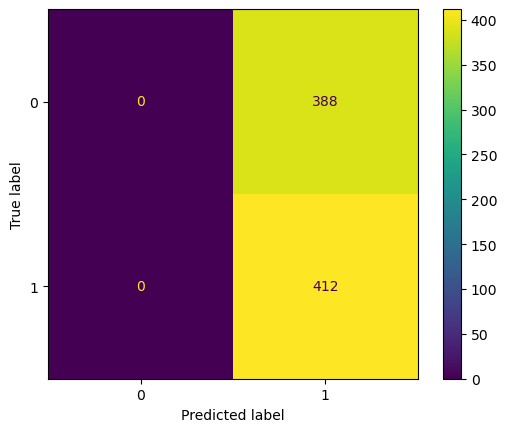

In [106]:
#evaluating the model
cm = confusion_matrix(y_test, y_pred, labels = rf_val.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_val.classes_)
disp.plot();


In [99]:
print("Accuracy Score: "+str(accuracy_score(y_test, y_pred)))
print("Precision Score: "+str(precision_score(y_test, y_pred)))
print("Recall Score: "+str(recall_score(y_test, y_pred)))
print("F1 Score: "+str(f1_score(y_test, y_pred)))

Accuracy Score: 0.515
Precision Score: 0.515
Recall Score: 1.0
F1 Score: 0.6798679867986799


# Conclusion
For this type of problem the logistic regression with the scaled values is the best model "clf_2". Given that the goal is to identify when the price of gold is gonna go up.

**Note:**
 The Random Forest Classifier can be improve setting different hyperparameters but the compiling time can increase drastically.